<a href="https://colab.research.google.com/github/Barros313/Big-Data-1---Senac-TADS028/blob/main/BigData1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação do Banco de Dados

Importação de bibliotecas externas e criação de função para fazer o banco de dados em SQL a partir de banco de dados em CSV

In [1]:
import requests
import sqlite3
import pandas as pd

def create_infracoes_database():
  url = 'http://dados.recife.pe.gov.br/api/3/action/datastore_search?resource_id=c269789d-da47-4dde-8ce7-42fba10fe8e2&limit=470000'

  response = requests.get(url)
  data = response.json()

  if 'result' in data and 'records' in data['result']:
    infracoes = data['result']['records']
  else:
    print("Erro: não foi possível obter dados da API")
    return

  conn = sqlite3.connect('infracoes.db')
  c = conn.cursor()

  c.execute('''
    CREATE TABLE IF NOT EXISTS infracoes (
      id INTEGER PRIMARY KEY AUTOINCREMENT,
      datainfracao DATE,
      horainfracao TIMESTAMP,
      dataimplantacao DATETIME,
      agenteequipamento TEXT,
      infracao INT,
      descricaoinfracao TEXT,
      amparolegal TEXT,
      localcometimento TEXT
    )
  ''')

  for infracao in infracoes:
    c.execute('''
      INSERT INTO infracoes (
        datainfracao,
        horainfracao,
        dataimplantacao,
        agenteequipamento,
        infracao,
        descricaoinfracao,
        amparolegal,
        localcometimento)
      VALUES (?, ?, ?, ?, ?, ?, ?, ?);
    ''', (
        infracao.get("datainfracao", ""),
        infracao.get("horainfracao", ""),
        infracao.get("dataimplantacao", ""),
        infracao.get("agenteequipamento", ""),
        infracao.get("infracao", 0),
        infracao.get("descricaoinfracao", ""),
        infracao.get("amparolegal", ""),
        infracao.get("localcometimento", "")
        ))

  conn.commit()
  conn.close()

create_infracoes_database()



# Consulta geral

Consultando tabela única (infrações) do banco de dados

In [2]:
connection = sqlite3.connect('infracoes.db')

pd.read_sql("SELECT * FROM infracoes;", connection, index_col=["id"])

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
id,,,,,,,,
1,2023-01-01T00:00:00,00:01:00,2023-01-06T00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,7234,Quando o veículo estiver em movimento deixar d...,"Art. 250, Inc. I, alínea a","RUA RIBEIRO DE BRITO, SOB O SEMAFORO N. 155"
2,2023-01-01T00:00:00,00:27:00,2023-01-06T00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5835,Desobedecer às ordens emanadas da autoridade c...,Art. 195,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
3,2023-01-01T00:00:00,00:27:00,2023-01-06T00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5215,Dirigir ameaçando os pedestres que estejam atr...,Art. 170,"RUA DOS NAVEGANTES, CRUZAMENTO COM A RUA PADRE..."
4,2023-01-01T00:00:00,00:52:00,2023-01-06T00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
5,2023-01-01T00:00:00,00:52:00,2023-01-06T00:00:00,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII","AVENIDA ENGENHEIRO DOMINGOS FERREIRA, EM FRENT..."
...,...,...,...,...,...,...,...,...
459709,2023-11-30T00:00:00,21:48:51,2023-12-06T00:00:00,Código 5 - FOTO SENSOR,5746,Transitar em locais e horários não permitidos ...,"Art. 187, Inc. I","AV. CDE. DA BOA VISTA, SEMAFORO 486, Sentido:C..."
459710,2023-11-30T00:00:00,21:51:48,2023-12-06T00:00:00,Código 5 - FOTO SENSOR,5746,Transitar em locais e horários não permitidos ...,"Art. 187, Inc. I","AV. CDE. DA BOA VISTA, SEMAFORO 486, Sentido:C..."
459711,2023-11-30T00:00:00,21:59:00,2023-12-11T00:00:00,Código 7 - ZONA AZUL TALÃO ELETRÔNICO,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII","PRACA DO DERBY, LADO OPOSTO AO N. 149"


# SQL Query

Função de select geral para utilizar no pandas

In [3]:
infra = pd.read_sql_query("SELECT * FROM infracoes;", connection)

# Características da Tabela



### Informações

Informa se valores há valores nulos, o tipo da célula e o nome das colunas


|Output|Descrição|
|---|---|
|count|Quantidade de Registros|
|mean|Média|
|std|Desvio Padrão|
|min|Valor mínimo|
|max|Valor máximo|
|n%|Valor percentual em relação ao máximo|

In [4]:
infra.describe()

,id,infracao
count,459713.000000,459713.000000
mean,229857.000000,6607.109107
std,132707.856487,913.657366
min,1.000000,5010.000000
25%,114929.000000,5550.000000
50%,229857.000000,7234.000000
75%,344785.000000,7455.000000
max,459713.000000,7765.000000


In [6]:
infra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459713 entries, 0 to 459712
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 459713 non-null  int64 
 1   datainfracao       459713 non-null  object
 2   horainfracao       459713 non-null  object
 3   dataimplantacao    459713 non-null  object
 4   agenteequipamento  459713 non-null  object
 5   infracao           459713 non-null  int64 
 6   descricaoinfracao  459713 non-null  object
 7   amparolegal        459713 non-null  object
 8   localcometimento   459713 non-null  object
dtypes: int64(2), object(7)
memory usage: 31.6+ MB


####Período de análise

In [7]:
primeiro_registro = pd.to_datetime(infra['datainfracao']).dt.date.min()
print("Primeiro registro: ", primeiro_registro)

ultimo_registro = pd.to_datetime(infra['datainfracao']).dt.date.max()
print("Último registro: ", ultimo_registro)

Primeiro registro:  2023-01-01
Último registro:  2023-11-30


###Descrição de colunas

Data da Infração

In [8]:
print(infra["datainfracao"].describe())

count                  459713
unique                    334
top       2023-05-14T00:00:00
freq                     2191
Name: datainfracao, dtype: object


Hora da Infração

In [9]:
print(infra["horainfracao"].describe())

count       459713
unique       56225
top       15:00:00
freq           803
Name: horainfracao, dtype: object


Data de Registro da Infração

In [10]:
print(infra["dataimplantacao"].describe())

count                  459713
unique                    156
top       2023-01-24T00:00:00
freq                     9752
Name: dataimplantacao, dtype: object


Forma de autuação

In [11]:
print(infra["agenteequipamento"].describe())

count                            459713
unique                                6
top       Código 3 - LOMBADA ELETRÔNICA
freq                             150430
Name: agenteequipamento, dtype: object


Código da Infração

In [12]:
print(infra["infracao"].describe())

count    459713.000000
mean       6607.109107
std         913.657366
min        5010.000000
25%        5550.000000
50%        7234.000000
75%        7455.000000
max        7765.000000
Name: infracao, dtype: float64


Descrição da Infração

In [13]:
print(infra["descricaoinfracao"].describe())

count                                                459713
unique                                                  255
top       Transitar em velocidade superior à máxima perm...
freq                                                 134642
Name: descricaoinfracao, dtype: object


Local da Infração

In [14]:
print(infra["localcometimento"].describe())

count                                              459713
unique                                              48237
top       CAIS SANTA RITA, PROX. AO N. 675 - SENT. CENTRO
freq                                                10958
Name: localcometimento, dtype: object


Amparo Legal

In [21]:
print(infra["amparolegal"].describe())

count               459713
unique                 186
top       ART. 218, INC. I
freq                134642
Name: amparolegal, dtype: object


#Verificação de Valores

####Procurar por valores não numéricos e nulos

In [16]:
print(infra.isna().value_counts())


id     datainfracao  horainfracao  dataimplantacao  agenteequipamento  infracao  descricaoinfracao  amparolegal  localcometimento
False  False         False         False            False              False     False              False        False               459713
Name: count, dtype: int64


In [17]:
print(infra.isnull().value_counts())

id     datainfracao  horainfracao  dataimplantacao  agenteequipamento  infracao  descricaoinfracao  amparolegal  localcometimento
False  False         False         False            False              False     False              False        False               459713
Name: count, dtype: int64


#### Ajustando amparo legal


In [20]:
infra['amparolegal'].unique()

array(['ART. 250, INC. I, ALÍNEA A', 'ART. 195', 'ART. 170',
       'ART. 181, INC. XVIII', 'ART. 181, INC. VIII', 'ART. 185, INC. I',
       'ART. 208', 'ART. 252, §ÚNICO', 'ART. 167', 'ART. 218, INC. I',
       'ART. 187, INC. I', 'ART. 218, INC. II', 'ART. 183',
       'ART. 218, INC. III', 'ART. 207', 'ART. 181, INC. XVII',
       'ART. 181, INC. IX', 'ART. 178', 'ART. 184, INC. III',
       'ART. 252, INC. IV', 'ART. 244, X', 'ART. 186, INC. II',
       'ART. 182, INC. VII', 'ART. 230, INC. VI', 'ART. 201',
       'ART. 182, INC. X', 'ART. 181, INC. XIII', 'ART. 181, INC. XI',
       'ART. 196', 'ART. 206, INC. III', 'ART. 169', 'ART. 252, INC. VI',
       'ART. 181, INC. XIX', 'ART. 252, INC. I', 'ART. 252, INC. V',
       'ART. 181, INC. I', 'ART. 181, INC. XX', 'ART. 193', 'ART. 197',
       'ART. 230, INC. V', 'ART. 162, INC. V', 'ART. 221',
       'ART. 162, INC. I', 'ART. 244, INC. I', 'ART. 250, INC. III',
       'ART. 186, INC. I', 'ART. 230, INC. XXII', 'ART. 182, INC. VI

Corrigindo valores


In [19]:
infra['amparolegal'] = infra['amparolegal'].str.upper()
infra.loc[infra['amparolegal'].str.contains('SENTIDO'), 'amparolegal'] = "Valores Inválidos"

#Análise dos Dados


### Infrações por meses do ano



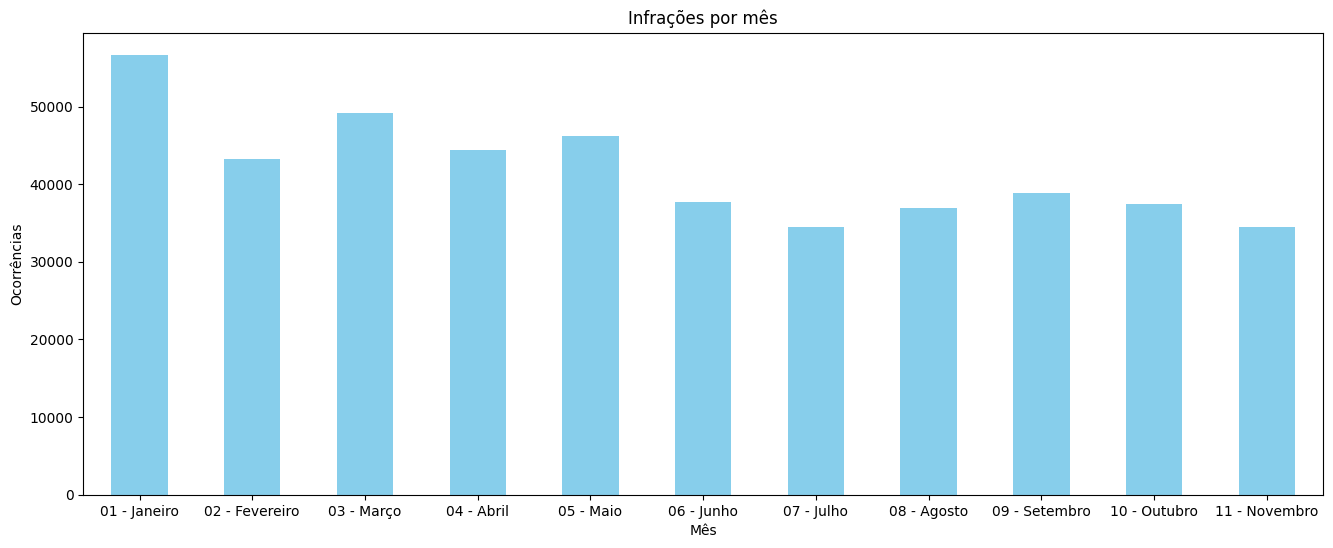

In [34]:
import matplotlib.pyplot as plt

# Converter para datetime
infra['datainfracao'] = pd.to_datetime(infra['datainfracao'])

# Dicionário com o nome de cada mês
meses = {
    1: '01 - Janeiro',
    2: '02 - Fevereiro',
    3: '03 - Março',
    4: '04 - Abril',
    5: '05 - Maio',
    6: '06 - Junho',
    7: '07 - Julho',
    8: '08 - Agosto',
    9: '09 - Setembro',
    10: '10 - Outubro',
    11: '11 - Novembro',
    12: '12 - Dezembro',
}

# Criação da tabela mês
infra['mes'] = infra['datainfracao'].dt.month.map(meses)

# Extrair dados de cada mês
infra_por_mes = infra.groupby('mes').size()

# Criação do gráfico
plt.figure(figsize=(16, 6))
infra_por_mes.plot(kind='bar', color='skyblue')
plt.title('Infrações por mês')
plt.xlabel('Mês')
plt.ylabel('Ocorrências')
plt.xticks(rotation=0)
plt.show()

###Infrações por hora

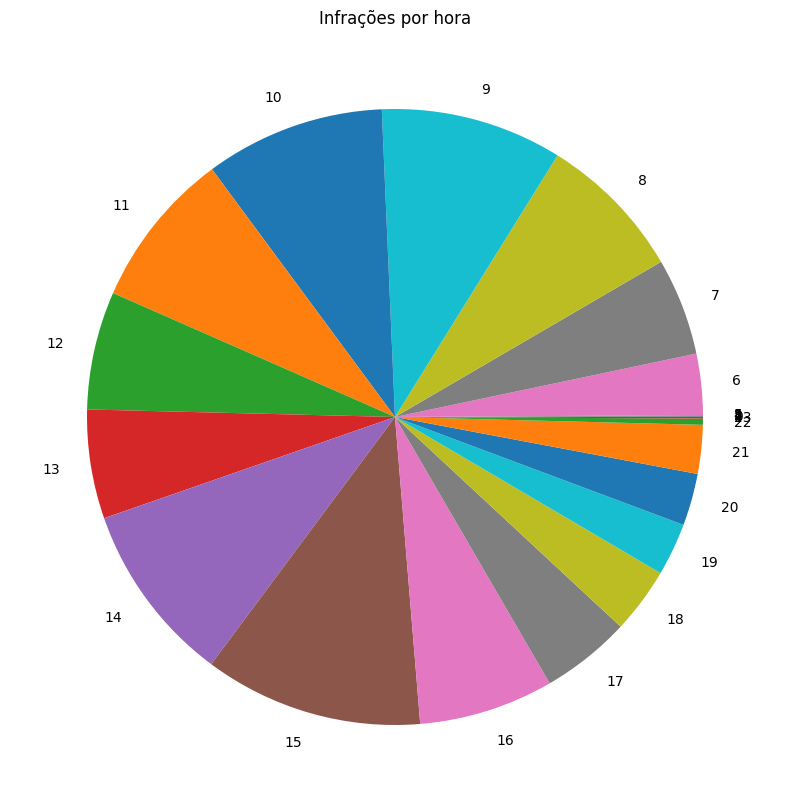

In [48]:
infra['hora'] = pd.to_datetime(infra['horainfracao'], format='%H:%M:%S').dt.hour

infra_por_hora = infra.groupby('hora').size()

plt.figure(figsize=(10, 10))
infra_por_hora.plot(kind='pie')
plt.title('Infrações por hora')
plt.xticks(rotation=0)

plt.show()

###Infrações mais cometidas

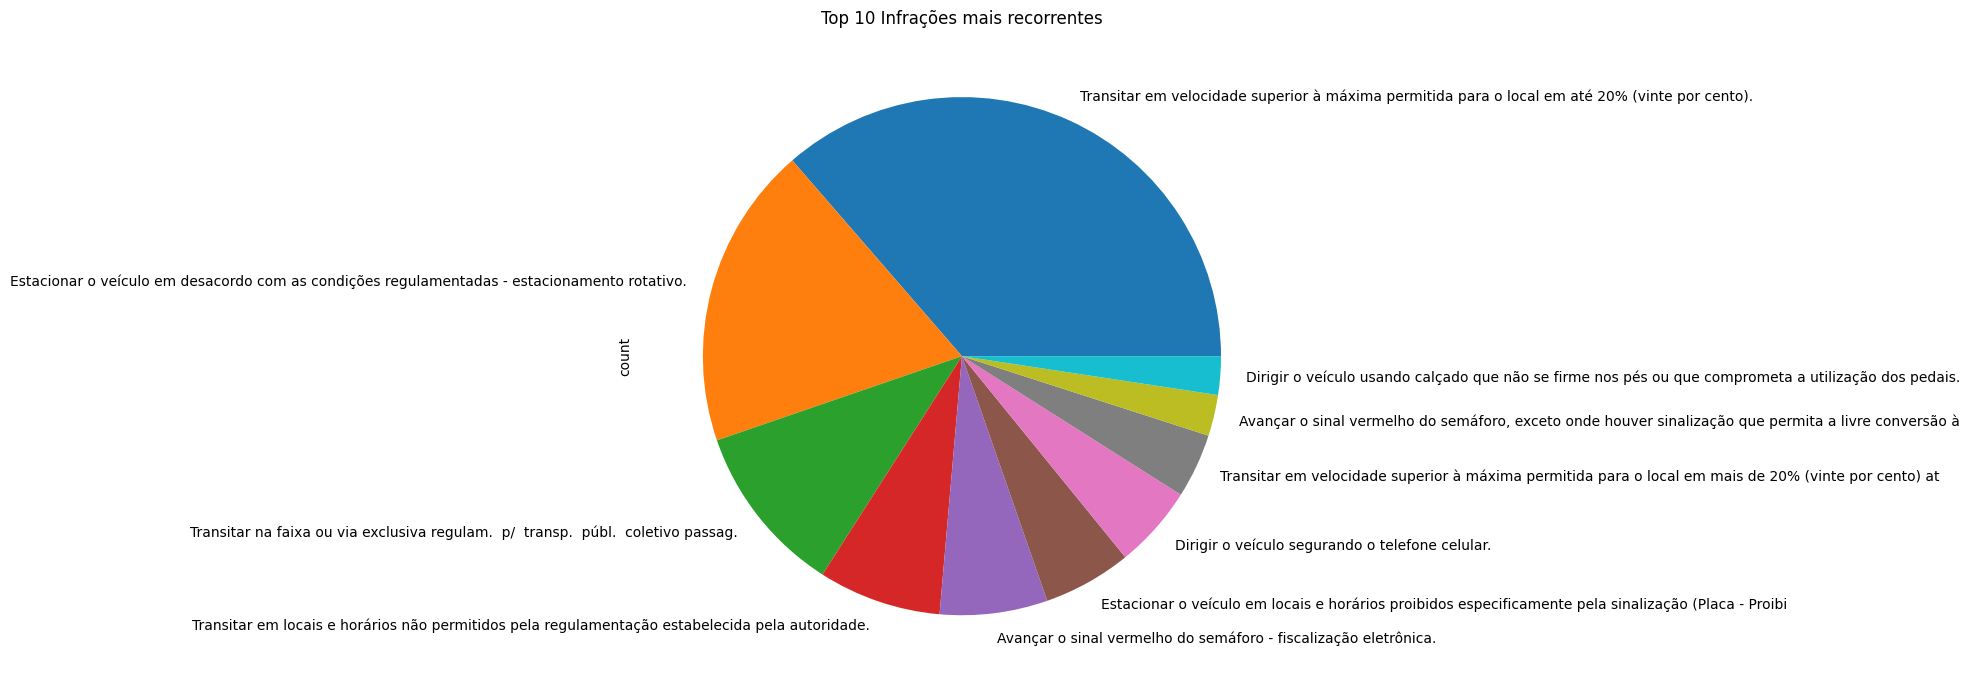

In [53]:
infra_por_tipo = infra['descricaoinfracao'].value_counts().nlargest(10)

plt.figure(figsize=(15, 7))
infra_por_tipo.plot(kind='pie')
plt.title('Top 10 Infrações mais recorrentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()